In [354]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')


In [355]:
data=pd.read_excel('/content/CropCompute.xls')
data.head()

,Division,Block,Area (Hectare),Field Type,Harvesting Year,Year of Planting,Age,Annual Crop (Ton),Yield Per Hectare (Ton)
0,BOLEMBO,331b,7,Immature,2014,2013,1,18646,2663.714286
1,BOLEMBO,332b,30,Immature,2014,2013,1,44075,1469.166667
2,BOLEMBO,333,37,Immature,2014,2013,1,59361,1604.351351
3,LIKAKASA,373b,38,Mature,2014,2013,1,60142,1582.684211
4,LIKAKASA,374a,79,Mature,2014,2013,1,81904,1036.759494


In [356]:
# Change column names
data = data.rename(columns={'Area (Hectare)': 'Area', 'Field Type': 'Field_type', 'Harvesting Year': 'Harvesting_year', 'Year of Planting': 'Year_of_planting','Annual Crop (Ton)' : 'Annual_crop', 'Yield Per Hectare (Ton)':'Yield_per_hectare' })
print(data)

     Division  Block  Area Field_type  Harvesting_year  Year_of_planting  Age  \
0     BOLEMBO   331b     7   Immature             2014              2013    1   
1     BOLEMBO   332b    30   Immature             2014              2013    1   
2     BOLEMBO    333    37   Immature             2014              2013    1   
3    LIKAKASA   373b    38     Mature             2014              2013    1   
4    LIKAKASA  374a     79     Mature             2014              2013    1   
..        ...    ...   ...        ...              ...               ...  ...   
410    MOSITE    443    75     Mature             2018              1992   26   
411    MOSITE    444    95     Mature             2018              1992   26   
412  LIKAKASA   352b    32     Mature             2018              1991   27   
413  LIKAKASA    353    76     Mature             2018              1991   27   
414     MAKAU    315    62     Mature             2018              1991   27   

     Annual_crop  Yield_per

In [357]:
data.duplicated().sum()

0

In [358]:
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (415, 9)


In [359]:
data.describe()

,Area,Harvesting_year,Year_of_planting,Age,Annual_crop,Yield_per_hectare
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,58.975904,2016.000000,2005.409639,10.590361,73047.024096,1385.597961
std,39.681089,1.415921,8.190126,8.311618,71865.585867,939.056630
min,1.000000,2014.000000,1991.000000,1.000000,1390.000000,118.802632
25%,35.000000,2015.000000,1995.000000,4.000000,20904.500000,580.843846
50%,53.000000,2016.000000,2010.000000,7.000000,59361.000000,1357.262500
75%,80.000000,2017.000000,2012.000000,20.000000,99305.000000,1848.107202
max,210.000000,2018.000000,2013.000000,27.000000,534228.000000,5888.555556


In [360]:
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))
print(data.info())

| Division   | Block   | Area   | Field_type   | Harvesting_year   | Year_of_planting   | Age   | Annual_crop   | Yield_per_hectare   |
|:-----------|:--------|:-------|:-------------|:------------------|:-------------------|:------|:--------------|:--------------------|
| BOLEMBO    | 331b    | 7      | Immature     | 2014              | 2013               | 1     | 18646         | 2663.71             |
| BOLEMBO    | 332b    | 30     | Immature     | 2014              | 2013               | 1     | 44075         | 1469.17             |
| BOLEMBO    | 333     | 37     | Immature     | 2014              | 2013               | 1     | 59361         | 1604.35             |
| LIKAKASA   | 373b    | 38     | Mature       | 2014              | 2013               | 1     | 60142         | 1582.68             |
| LIKAKASA   | 374a    | 79     | Mature       | 2014              | 2013               | 1     | 81904         | 1036.76             |
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [361]:
data['Block'].unique()

array(['331b', '332b', '333', '373b', '374a ', '375', '441c', '453b',
       '356b', '331a', '332a', '371b', '372', '373a', '361b', '362b',
       '441b', '451b', '452b', '453a', '342b', '343b', '344', '345',
       '356a', '321b', '321c', '371', '361', '362', '364c', '365c',
       '366c', '451', '452', '341', '342', '343', '311b', '327b', '363d',
       '364b', '365b', '366b', '326b', '327', '321', '322', '323', '324',
       '325', '326', '366', '313b', '363c', '364', '365', '363b', '363',
       '442b', '443c', '444c', '385', '443b', '387', '388', '389', '444b',
       '380', '381', '382', '383', '384', '354', '378', '379', '441',
       '442', '443', '444', '352b', '353', '315'], dtype=object)

In [362]:
# Get the number of unique values in the 'Block' column
num_unique_blocks = data['Block'].nunique()

# Print the number of unique values
print(f"Number of unique blocks: {num_unique_blocks}")

Number of unique blocks: 83


In [363]:
block_column = data['Block'].value_counts()

In [364]:
block_column

Block
331b    5
385     5
443c    5
442b    5
363     5
       ..
321c    5
321b    5
356a    5
345     5
315     5
Name: count, Length: 83, dtype: int64

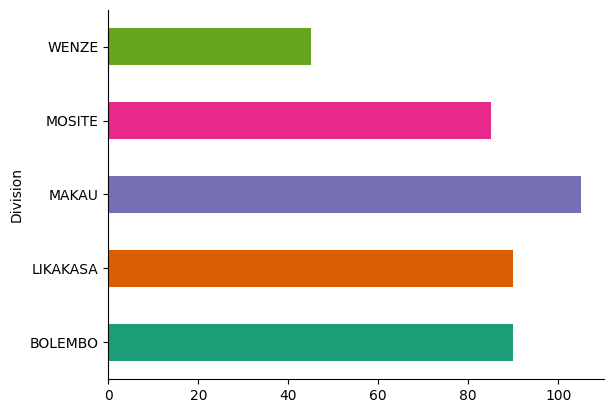

In [365]:
data.groupby('Division').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

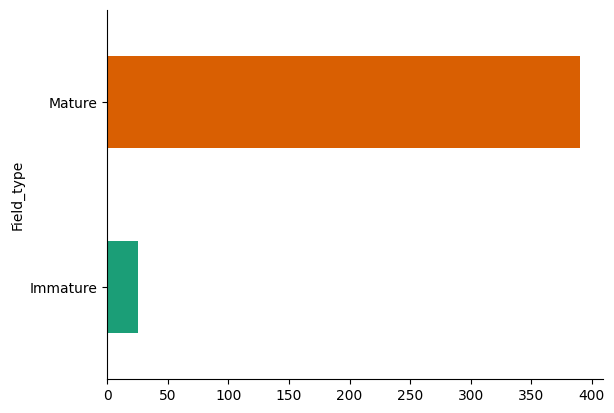

In [366]:
data.groupby('Field_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [222]:
#data = data.drop(columns=['Block'])
#data.head()

,Division,Area,Field_type,Harvesting_year,Year_of_planting,Age,Annual_crop,Yield_per_hectare
0,BOLEMBO,7,Immature,2014,2013,1,18646,2663.714286
1,BOLEMBO,30,Immature,2014,2013,1,44075,1469.166667
2,BOLEMBO,37,Immature,2014,2013,1,59361,1604.351351
3,LIKAKASA,38,Mature,2014,2013,1,60142,1582.684211
4,LIKAKASA,79,Mature,2014,2013,1,81904,1036.759494


In [367]:
data['Block'] = data['Block'].astype(str)

In [369]:
data.dtypes

Division              object
Block                 object
Area                   int64
Field_type            object
Harvesting_year        int64
Year_of_planting       int64
Age                    int64
Annual_crop            int64
Yield_per_hectare    float64
dtype: object

In [370]:
# Check for missing values
data.isnull().sum()

Division             0
Block                0
Area                 0
Field_type           0
Harvesting_year      0
Year_of_planting     0
Age                  0
Annual_crop          0
Yield_per_hectare    0
dtype: int64

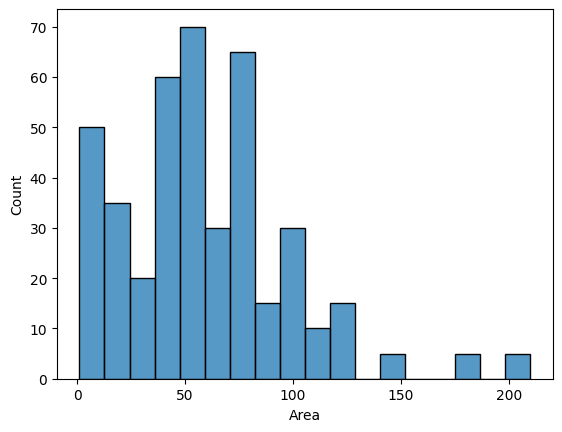

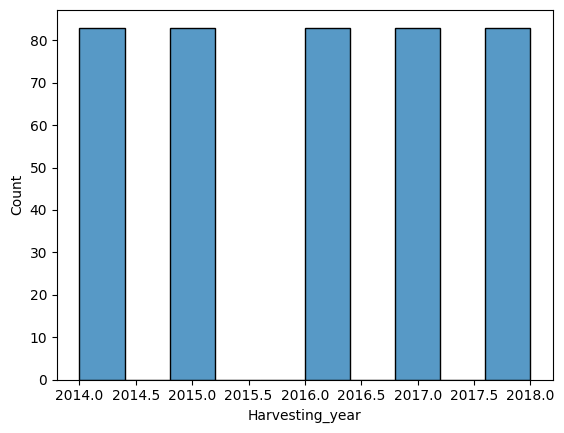

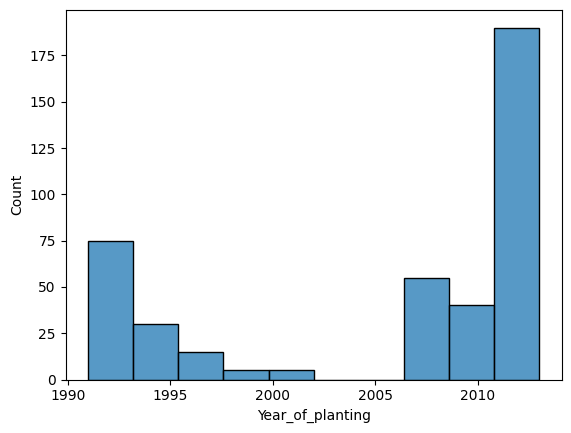

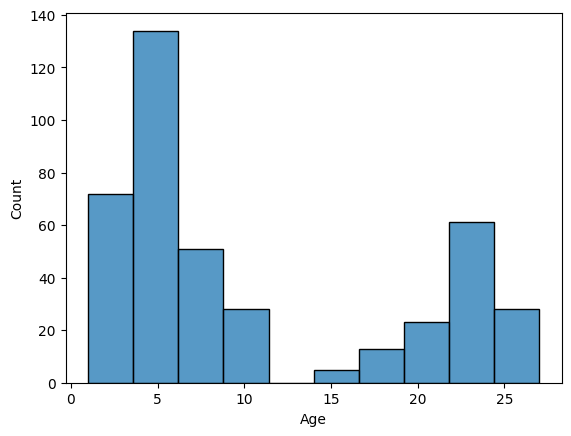

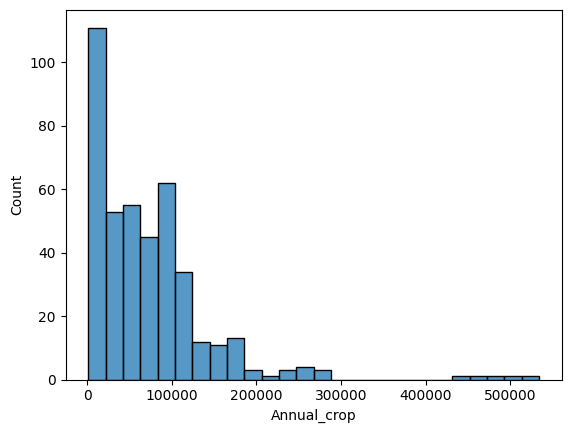

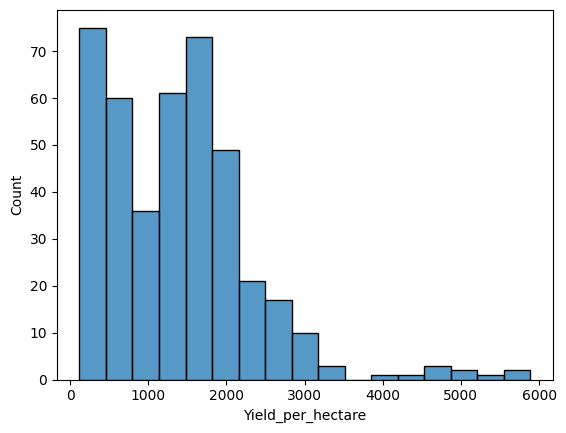

In [371]:
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x=i)
    plt.show()

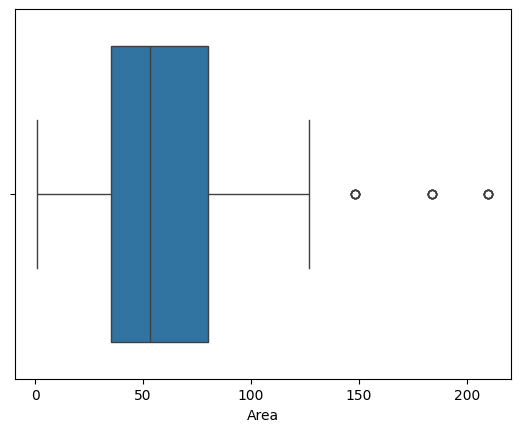

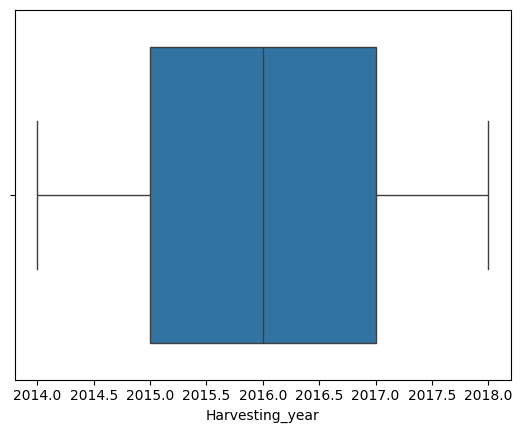

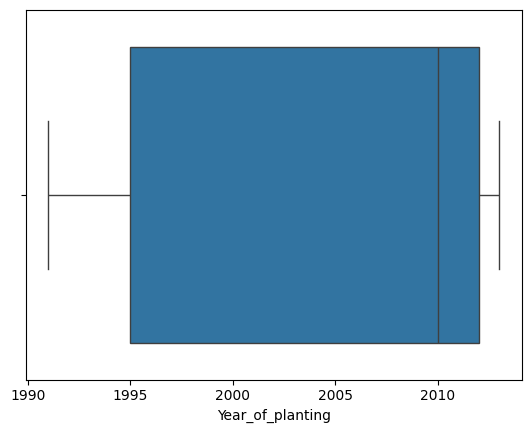

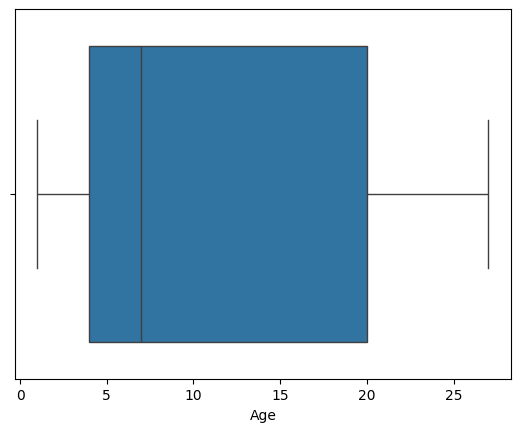

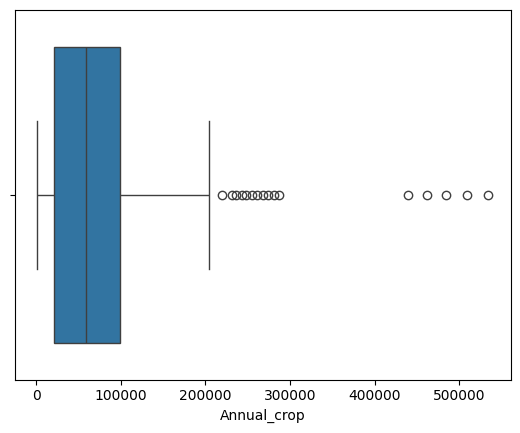

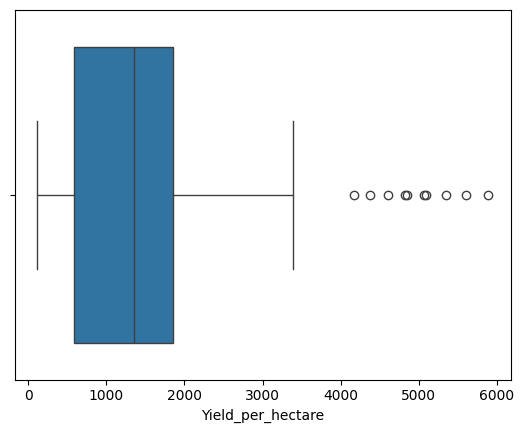

In [372]:
# Check for outliers

for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x=i)
    plt.show()


# **Scatter plot to understand the relationship**

In [373]:
data.select_dtypes(include='number').columns

Index(['Area', 'Harvesting_year', 'Year_of_planting', 'Age', 'Annual_crop',
       'Yield_per_hectare'],
      dtype='object')

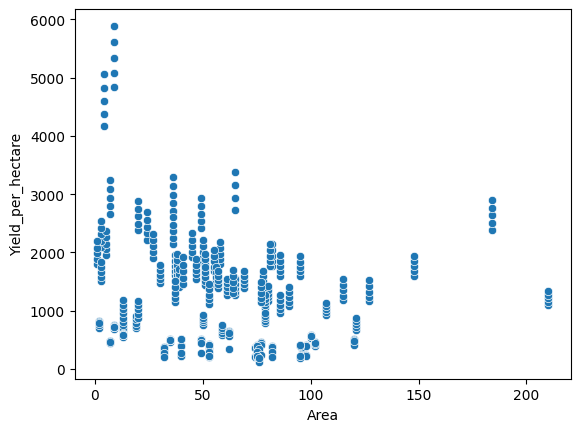

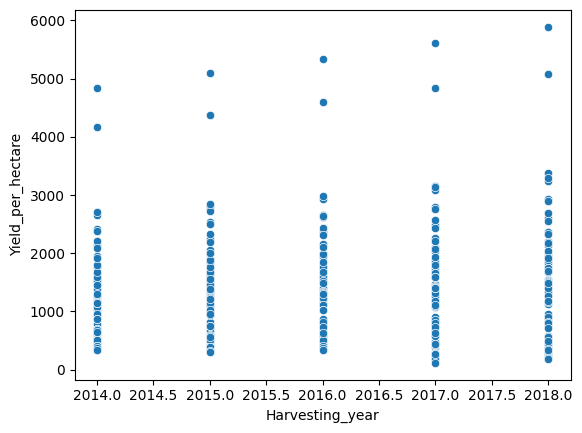

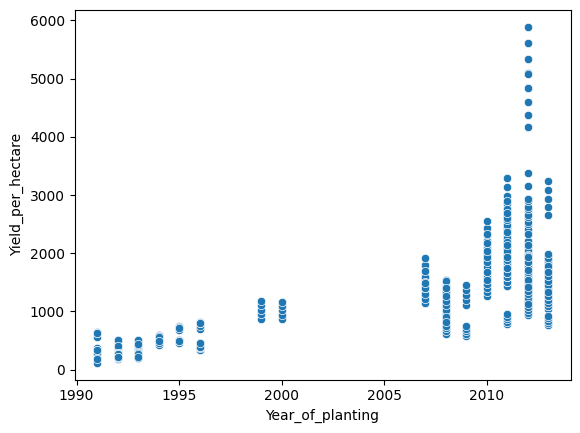

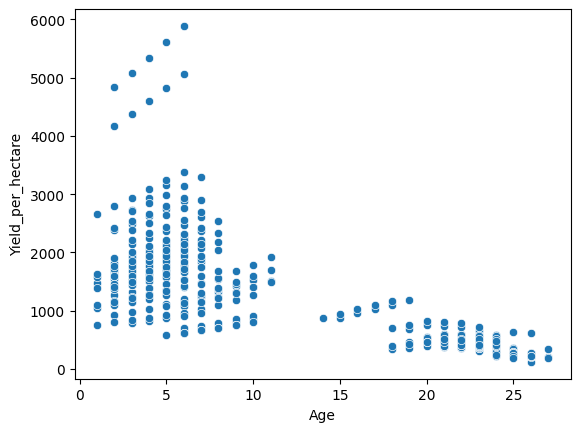

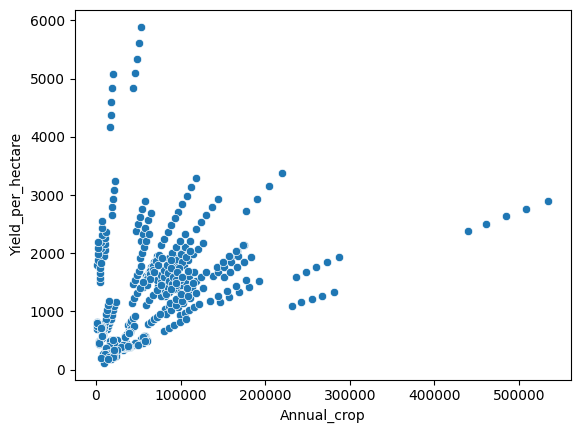

In [374]:
for i in ['Area', 'Harvesting_year', 'Year_of_planting', 'Age',
       'Annual_crop']:
    sns.scatterplot(data=data, x=i, y='Yield_per_hectare')
    plt.show()

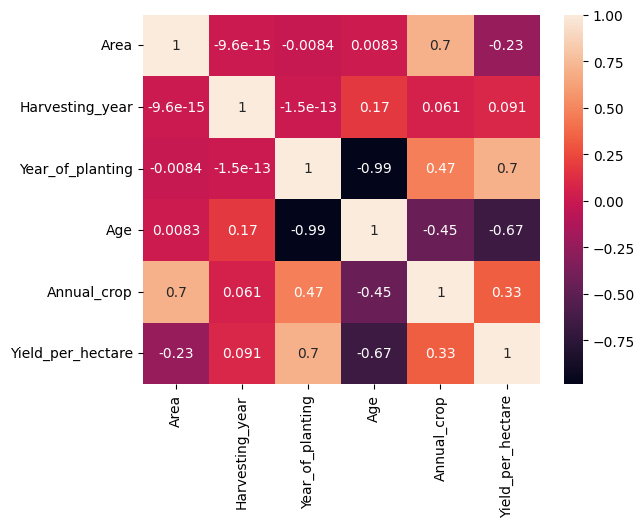

In [375]:
n = data.select_dtypes(include='number').corr()
sns.heatmap(n, annot=True)
plt.show()

# **Deleting Outliers**

In [376]:
drop_ind = data[(data['Annual_crop'] > 300000) & (data['Yield_per_hectare'] < 4000)].index

In [379]:
data = data.drop(drop_ind, axis = 0)

KeyError: '[57, 101, 147, 193, 233] not found in axis'

In [380]:
data.shape

(410, 9)

In [381]:
drop_ind_part2 = data[(data['Area'] > 150) & (data['Yield_per_hectare'] < 4000)].index

In [382]:
data[(data['Area'] > 150) & (data['Yield_per_hectare'] < 4000)]

,Division,Block,Area,Field_type,Harvesting_year,Year_of_planting,Age,Annual_crop,Yield_per_hectare
7,MOSITE,453b,210,Mature,2014,2013,1,231140,1100.666667
27,MOSITE,453b,210,Mature,2015,2013,2,242697,1155.700000
62,MOSITE,453b,210,Mature,2016,2013,3,254831,1213.480952
106,MOSITE,453b,210,Mature,2017,2013,4,267572,1274.152381
152,MOSITE,453b,210,Mature,2018,2013,5,280950,1337.857143


In [383]:
data = data.drop(drop_ind_part2, axis = 0)

In [384]:
data.shape

(405, 9)

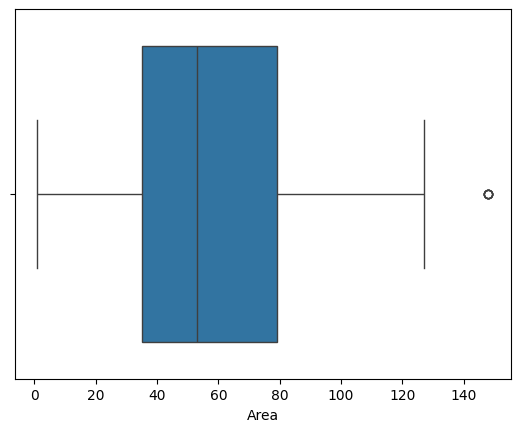

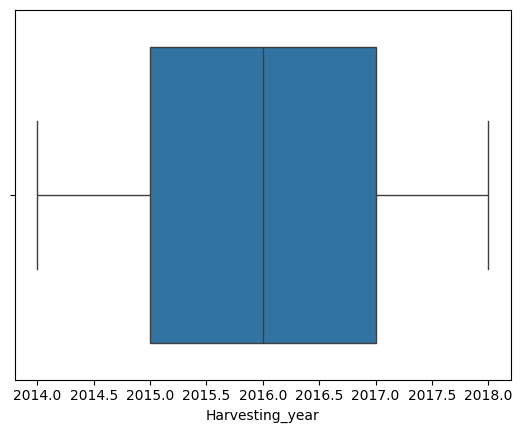

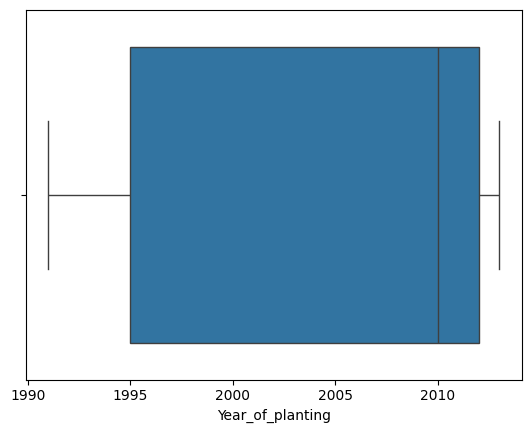

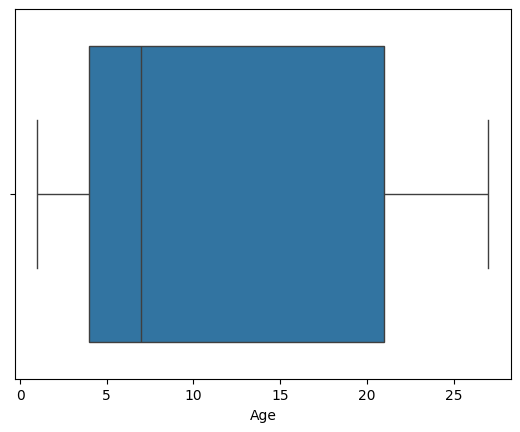

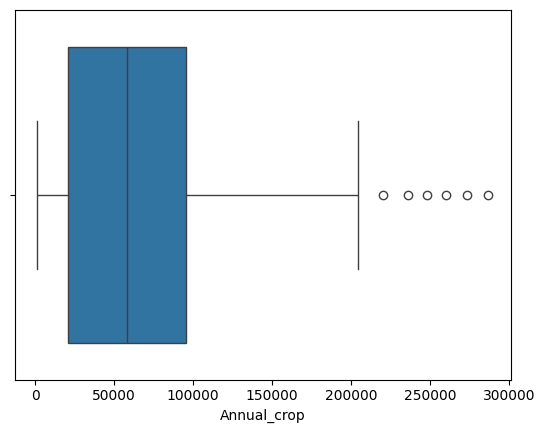

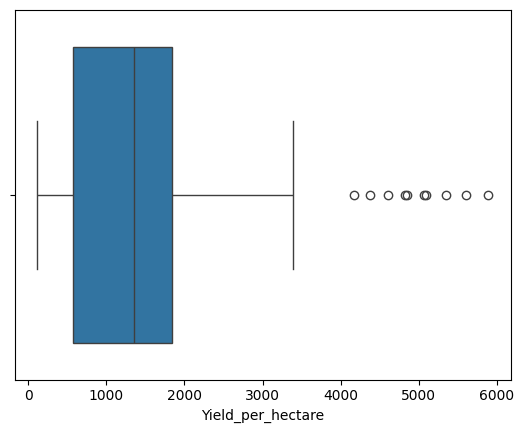

In [385]:
# Check for outliers

for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x=i)
    plt.show()

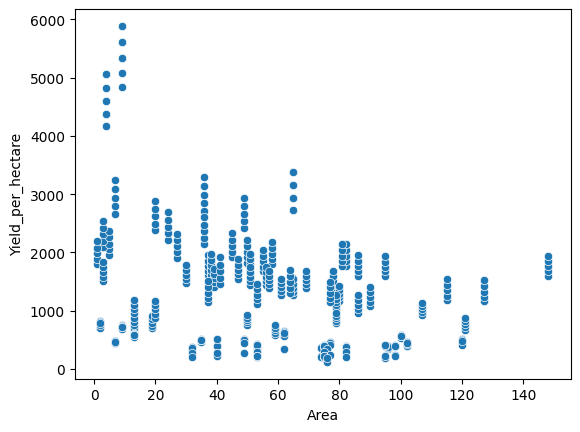

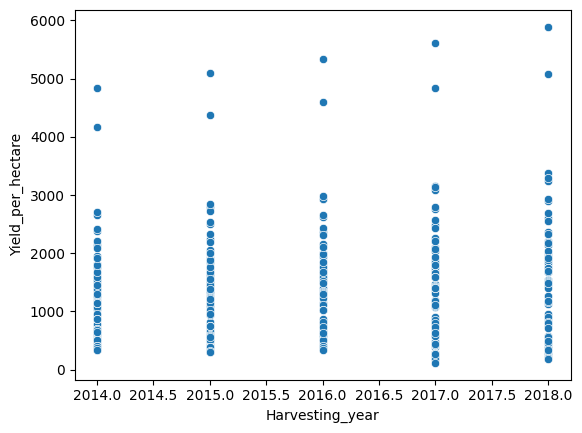

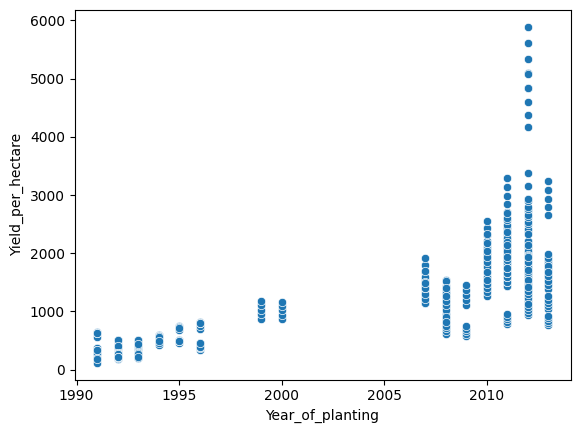

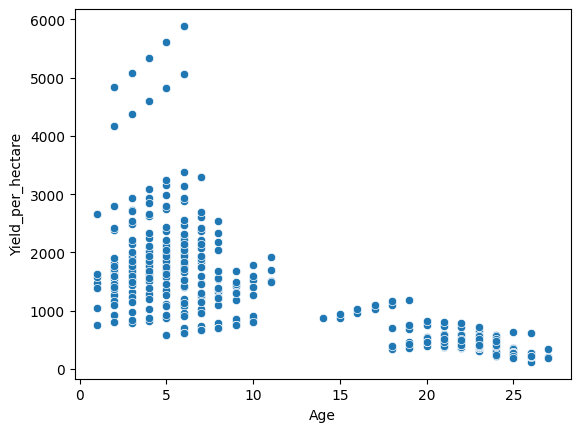

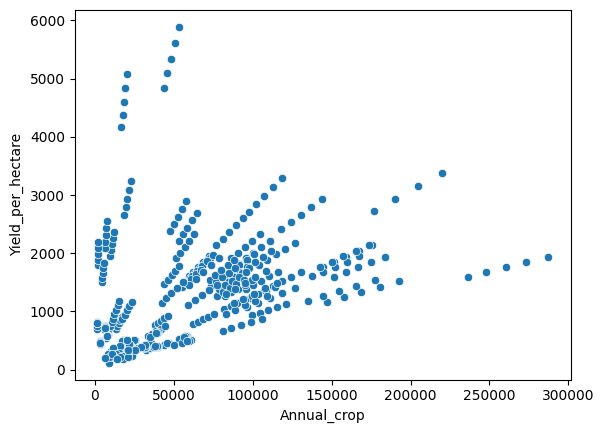

In [386]:
for i in ['Area', 'Harvesting_year', 'Year_of_planting', 'Age',
       'Annual_crop']:
    sns.scatterplot(data=data, x=i, y='Yield_per_hectare')
    plt.show()

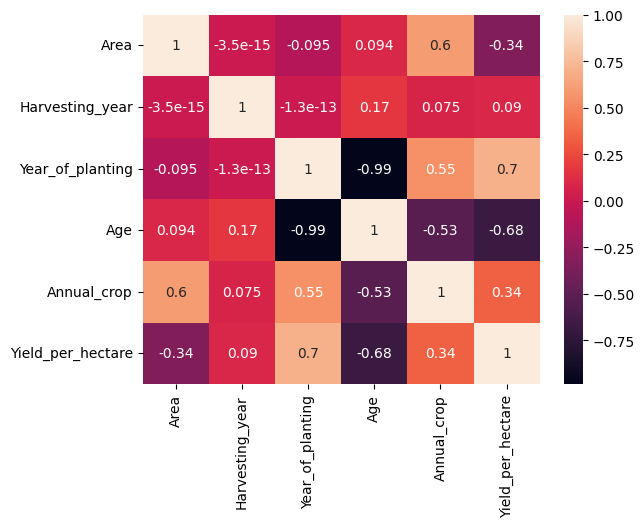

In [387]:
n = data.select_dtypes(include='number').corr()
sns.heatmap(n, annot=True)
plt.show()

In [388]:
numerical_data = data.select_dtypes(include='number')

In [389]:
numerical_data.corr()['Yield_per_hectare'].sort_values()

Age                 -0.679535
Area                -0.335349
Harvesting_year      0.089674
Annual_crop          0.337629
Year_of_planting     0.704979
Yield_per_hectare    1.000000
Name: Yield_per_hectare, dtype: float64

In [390]:
data.head(10)

,Division,Block,Area,Field_type,Harvesting_year,Year_of_planting,Age,Annual_crop,Yield_per_hectare
0,BOLEMBO,331b,7,Immature,2014,2013,1,18646,2663.714286
1,BOLEMBO,332b,30,Immature,2014,2013,1,44075,1469.166667
2,BOLEMBO,333,37,Immature,2014,2013,1,59361,1604.351351
3,LIKAKASA,373b,38,Mature,2014,2013,1,60142,1582.684211
4,LIKAKASA,374a,79,Mature,2014,2013,1,81904,1036.759494
5,LIKAKASA,375,69,Mature,2014,2013,1,95430,1383.043478
6,MOSITE,441c,51,Mature,2014,2013,1,83004,1627.529412
8,WENZE,356b,50,Mature,2014,2013,1,38055,761.100000
9,BOLEMBO,331a,65,Immature,2014,2012,2,101230,1557.384615
10,BOLEMBO,331b,7,Immature,2015,2013,2,19578,2796.857143


In [391]:
data.dtypes

Division              object
Block                 object
Area                   int64
Field_type            object
Harvesting_year        int64
Year_of_planting       int64
Age                    int64
Annual_crop            int64
Yield_per_hectare    float64
dtype: object

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [408]:
# Separate features (X) and target variable (y)
X = data.drop('Yield_per_hectare', axis=1)
y = data['Yield_per_hectare']

In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0, shuffle=True)

In [410]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [411]:
X_train.head(1)

,Division,Block,Area,Field_type,Harvesting_year,Year_of_planting,Age,Annual_crop
276,BOLEMBO,326,19,Mature,2018,2008,10,17306


In [412]:
y.head()

0    2663.714286
1    1469.166667
2    1604.351351
3    1582.684211
4    1036.759494
Name: Yield_per_hectare, dtype: float64

In [413]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [2,4,5,6,7]),
            ('OHE', ohe, [0,1,3]),
        ],
        remainder='passthrough'
)

In [414]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [2, 4, 5, 6, 7]),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0, 1, 3])])

In [415]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [416]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 150.10598196086576 score : 0.8960833204318708
lss : mae : 145.90167181616644 score : 0.9425445120607331
Rid : mae : 221.45317223587125 score : 0.8612807104965885
Dtr : mae : 223.79809560989713 score : 0.8116997416816165


# **Model Selection**

In [428]:
lss = Lasso()
lss.fit(X_train_dummy,y_train)
lss.predict(X_test_dummy)

array([ 283.98151359, 1573.34615569, 2329.51195285, 1320.92220508,
       1696.84551282,  840.36997387,  550.71907933, 1549.64751226,
        584.35814664, 2415.09341963, 1061.4079441 ,  331.26912494,
        404.38120856,  382.33579524, 1701.86173294, 1990.26978979,
       4784.9021183 , 2057.3604119 ,  388.13158393, 1634.74650094,
        892.7402693 , 1551.69400822, 2259.02199878, 2024.35139857,
        659.23248321,  738.70910164, 2593.94498618,  954.48245319,
       1007.6960873 , 2049.19390409, 1932.77505957,  358.61101909,
        246.81997886, 1513.55398551, 1720.47592511, 1817.276782  ,
        988.69215424,  854.75583734, 1866.48070692, 1796.24274576,
        514.90083873, 2056.59098297,  431.4588806 , 1058.80087533,
       1665.86698656, 1618.27769973,  819.76119837,  311.6359391 ,
       2227.92298654,  669.91300916, 2034.34354181, 2124.51368518,
       1214.24465436, 1224.18283345, 2503.19540245, 1979.10711145,
       2535.60687596, 1727.59192159, 1618.81298458, 2174.13466

In [436]:
def prediction(Division, Block,	Area,	Field_type,	Harvesting_year,	Year_of_planting,	Age,	Annual_crop):
    # Create an array of the input features
    features = np.array([[Division,	Block, Area,	Field_type,	Harvesting_year,	Year_of_planting,	Age,	Annual_crop]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    predicted_yield = lss.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [437]:
Division = 'WENZE'
Block = '356b'
Area = 50
Field_type = 'Mature'
Harvesting_year = 2014
Year_of_planting = 2013
Age = 1
Annual_crop = 38055

In [438]:
result = prediction(Division,	Block, Area,	Field_type,	Harvesting_year,	Year_of_planting,	Age,	Annual_crop)
result

array([871.55386747])